# Data Observations:
    1.) For the company "Pyber", urban routes are by far the most common. 
    They make up the majority of the companys profits. It should be noted, however, that urban fares are usually less profitable, but the number of ride shares requested are greater.
    2.)Rural ride shares are infrequent, and there is less call for drivers, but their fares are usually higher with the exception of a few outliers. 
    3.)The suburban ride shares are squarely in the middle of rural and urban in fare cost, total number of rides and driver count. 


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, how= "outer", on = "city")
# Display the data table for preview
combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
urban_df=combined_df.loc[(combined_df["type"]=="Urban")]
suburban_df = combined_df.loc[(combined_df["type"]=="Suburban")]
rural_df = combined_df.loc[(combined_df["type"]=="Rural")]

## Bubble Plot of Ride Sharing Data

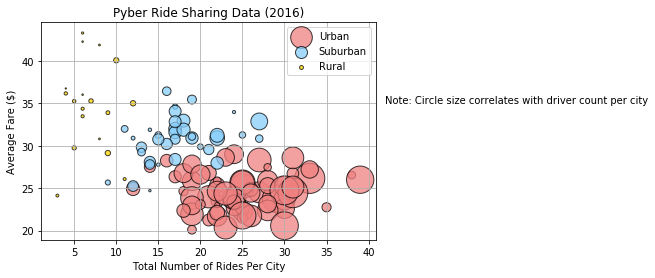

In [3]:
# Obtain the x and y coordinates for each of the three city types
#urban x & y
urban_x = urban_df.groupby(["city"]).driver_count.count()
urban_y = urban_df.groupby(["city"]).fare.mean()
total_drivers_urban=urban_df.groupby(["city"]).driver_count.sum()
#suburban x & y
suburban_x = suburban_df.groupby(["city"]).driver_count.count()
suburban_y = suburban_df.groupby(["city"]).fare.mean()
total_drivers_suburban=suburban_df.groupby(["city"]).driver_count.sum()
#rural x & y
rural_x = rural_df.groupby(["city"]).driver_count.count()
rural_y = rural_df.groupby(["city"]).fare.mean()
total_drivers_rural=rural_df.groupby(["city"]).driver_count.sum()
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker="o", s= total_drivers_urban*0.40, alpha=0.75, facecolor="lightcoral", edgecolors="black", label="Urban")
plt.scatter(suburban_x, suburban_y, marker="o", s= total_drivers_suburban*0.42, alpha=0.75, facecolor="lightskyblue", edgecolors="black", label="Suburban" )
plt.scatter(rural_x, rural_y, marker="o", s= total_drivers_rural*0.40, alpha =0.75, facecolor="gold", edgecolors= "black", label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city")

# Save Figure
plt.savefig("Images/Pyber Ride Sharing.png")


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

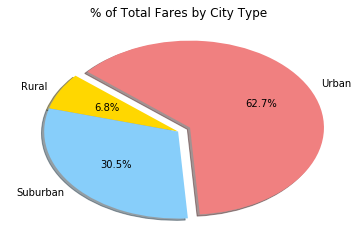

In [5]:
# Calculate Type Percents
total_fare = combined_df.groupby(["type"]).fare.sum()
explode=(0,0,0.1)
colors=("gold", "lightskyblue", "lightcoral")
labels=("Rural", "Suburban", "Urban")

# Build Pie Chart
plt.pie(total_fare, explode=explode, colors=colors, labels= labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("Images/Pyber Ride Sharing.png")


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

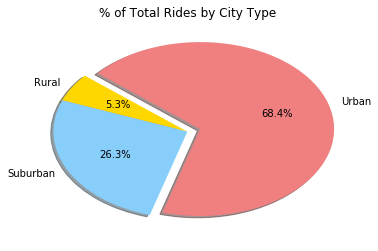

In [7]:
# Calculate Ride Percents
total_rides = combined_df.groupby(["type"]).ride_id.count()
explode=(0,0,0.1)
colors=("gold", "lightskyblue", "lightcoral")
labels=("Rural", "Suburban", "Urban")

# Build Pie Chart
plt.pie(total_rides, explode=explode, colors=colors, labels= labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("Images/Pyber Ride Sharing.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

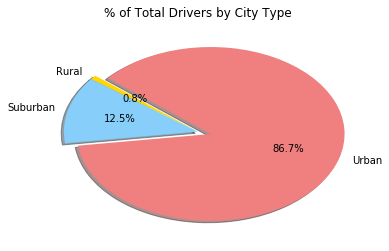

In [9]:
# Calculate Driver Percents
total_drivers = combined_df.groupby(["type"]).driver_count.sum()
explode=(0,0,0.1)
colors=("gold", "lightskyblue", "lightcoral")
labels=("Rural", "Suburban", "Urban")

# Build Pie Chart
plt.pie(total_drivers, explode=explode, colors=colors, labels= labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("Images/Pyber Ride Sharing.png")


In [10]:
# Show Figure
plt.show()